In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("testset.csv")
df.columns=[c.replace(' _','') for c in df.columns]

In [3]:
df.shape

(100990, 20)

In [4]:
df.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
df.columns

Index(['datetime_utc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

# Clean the data

In [6]:
df.isna().sum()

datetime_utc         0
conds               72
dewptm             621
fog                  0
hail                 0
heatindexm       71835
hum                757
precipm         100990
pressurem          232
rain                 0
snow                 0
tempm              673
thunder              0
tornado              0
vism              4428
wdird            14755
wdire            14755
wgustm           99918
windchillm      100411
wspdm             2358
dtype: int64

In [7]:
#np.isnan(df.loc[0]["heatindexm"])

In [8]:
df=df.dropna(subset=["conds","wdire"])
df=df.drop("precipm",axis=1)

In [9]:
df['pressurem'].replace(-9999.0,float('nan'),inplace=True)

In [10]:
df.isna().sum()

datetime_utc        0
conds               0
dewptm            604
fog                 0
hail                0
heatindexm      57022
hum               704
pressurem         906
rain                0
snow                0
tempm             631
thunder             0
tornado             0
vism             4428
wdird               0
wdire               0
wgustm          85105
windchillm      85598
wspdm            2356
dtype: int64

In [11]:
dic_n=dict(df.isna().sum())
for i in dic_n:
    if dic_n[i]>0:
        df[i].fillna(df[i].mean(), inplace = True)

In [12]:
df.isna().sum()

datetime_utc    0
conds           0
dewptm          0
fog             0
hail            0
heatindexm      0
hum             0
pressurem       0
rain            0
snow            0
tempm           0
thunder         0
tornado         0
vism            0
wdird           0
wdire           0
wgustm          0
windchillm      0
wspdm           0
dtype: int64

# Detect and remove outliers

In [13]:
from scipy import stats

In [14]:
num_df=df.select_dtypes(include=["number"])
df[np.all(stats.zscore(num_df) < 3, axis=1)]

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,35.65171,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,West,37.671175,5.713817,7.400000
1,19961101-12:00,Smoke,10.0,0,0,35.65171,32.0,2196.930079,0,0,28.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
2,19961101-13:00,Smoke,11.0,0,0,35.65171,44.0,2196.930079,0,0,24.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
3,19961101-14:00,Smoke,10.0,0,0,35.65171,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,North,37.671175,5.713817,8.979128
4,19961101-16:00,Smoke,11.0,0,0,35.65171,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,North,37.671175,5.713817,0.000000
5,19961101-17:00,Smoke,12.0,0,0,35.65171,56.0,1011.000000,0,0,21.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
6,19961101-18:00,Smoke,13.0,0,0,35.65171,60.0,1010.000000,0,0,21.0,0,0,0.800000,0.0,North,37.671175,5.713817,0.000000
7,19961101-19:00,Smoke,13.0,0,0,35.65171,60.0,2196.930079,0,0,21.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
8,19961101-20:00,Smoke,13.0,0,0,35.65171,68.0,2196.930079,0,0,19.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
9,19961101-21:00,Smoke,13.0,0,0,35.65171,68.0,1010.000000,0,0,19.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128


In [15]:
df.shape

(86177, 19)

# Make a plot of different numeric features like rain, snow, dewptm, etc. over the duration of a month or year or day

In [16]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [17]:
df = df.set_index('datetime_utc')

In [18]:
df_yr=df.resample('Y').mean()

In [19]:
num_df=df_yr.select_dtypes(include=["number"])

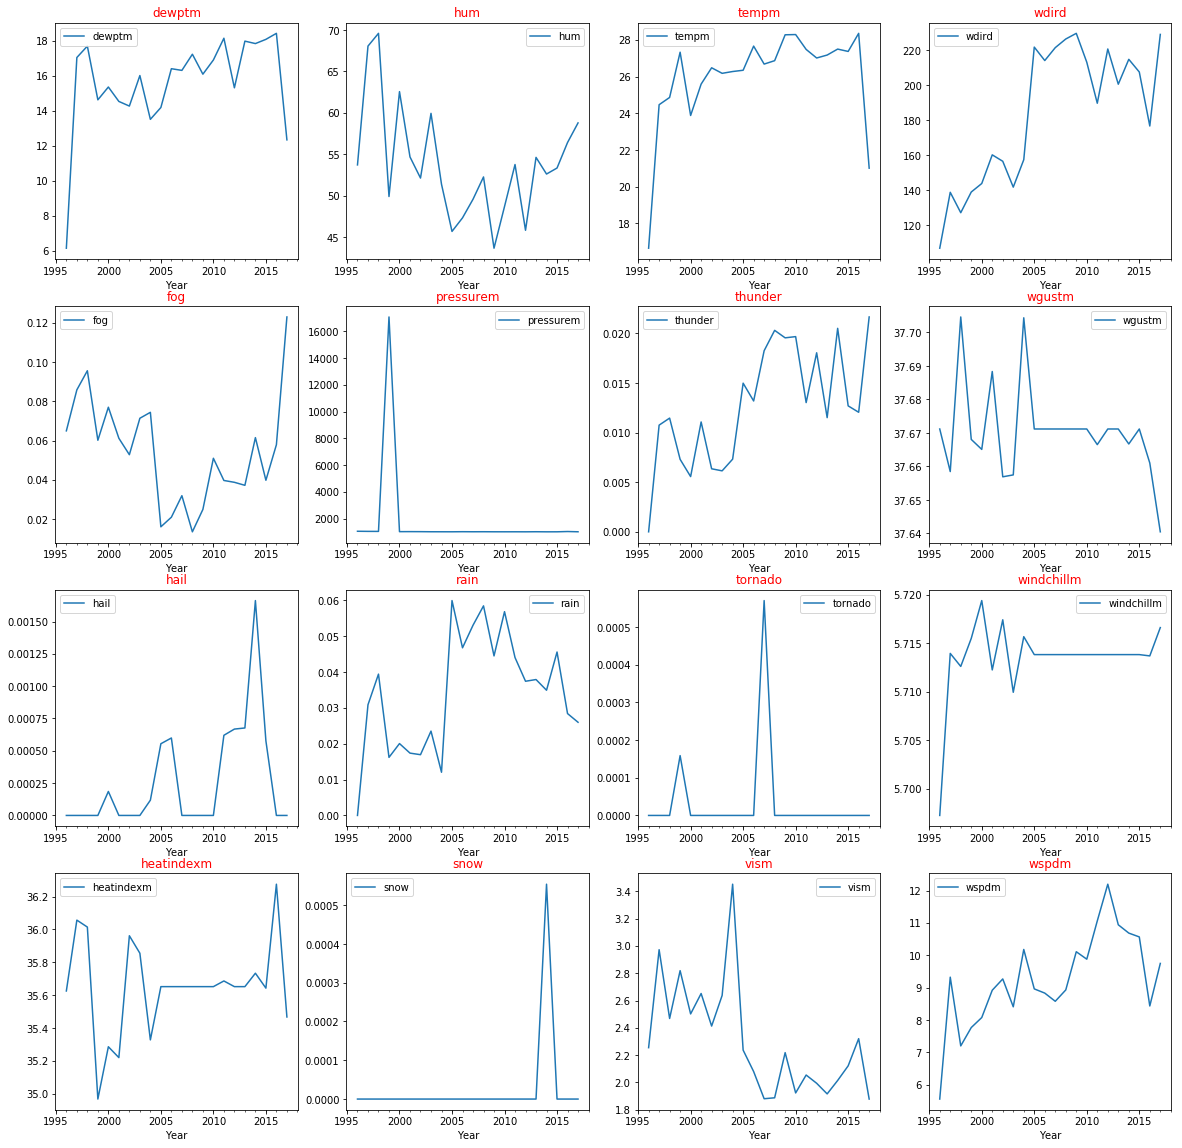

In [20]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
xx=0
yy=0
for i in num_df:
    df_yr.plot(ax=axes[xx,yy],y=i)
    axes[xx,yy].set_title(i,color='red')
    axes[xx,yy].set_xlabel('Year')
    xx+=1
    if xx==4:
        xx=0
        yy+=1

In [21]:
df2=df[["conds"]]

In [22]:
df2

,conds
datetime_utc,
1996-11-01 11:00:00,Smoke
1996-11-01 12:00:00,Smoke
1996-11-01 13:00:00,Smoke
1996-11-01 14:00:00,Smoke
1996-11-01 16:00:00,Smoke
1996-11-01 17:00:00,Smoke
1996-11-01 18:00:00,Smoke
1996-11-01 19:00:00,Smoke
1996-11-01 20:00:00,Smoke


In [23]:
df2['year']=list(str(np.datetime64(df2.index[x],'Y')) for x in range (df2.shape[0]))

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
dic_grp=df2.groupby('year').groups

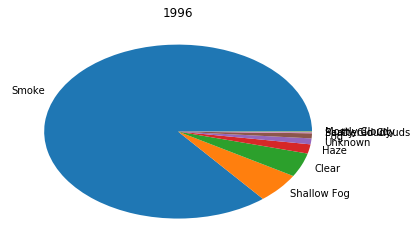

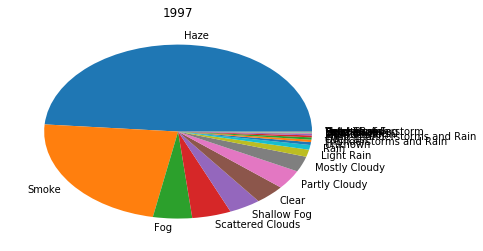

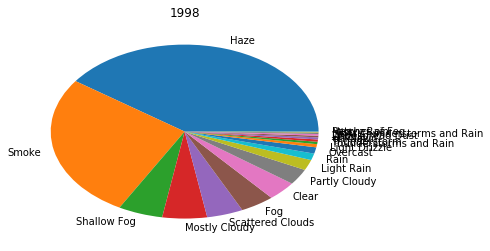

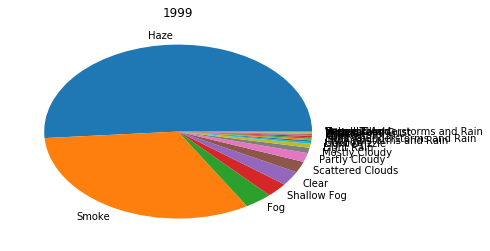

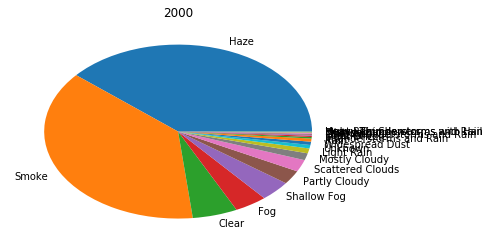

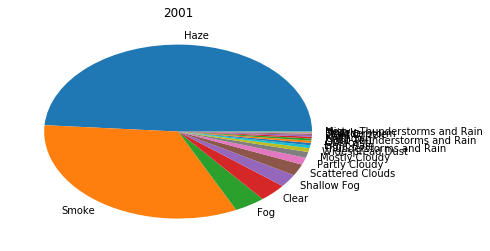

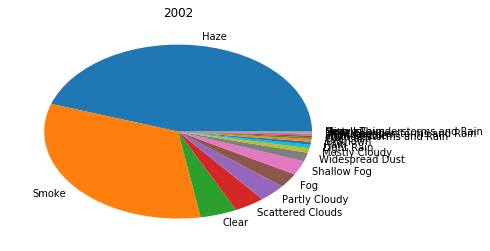

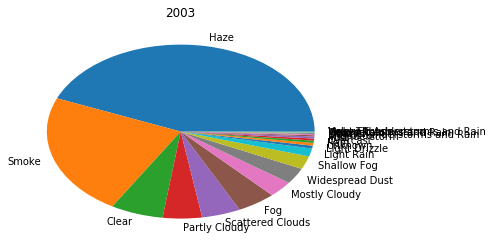

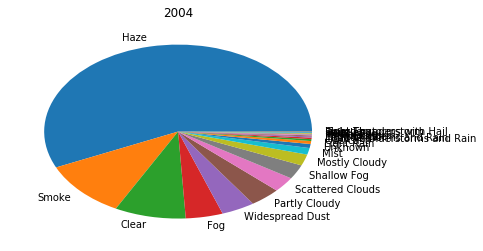

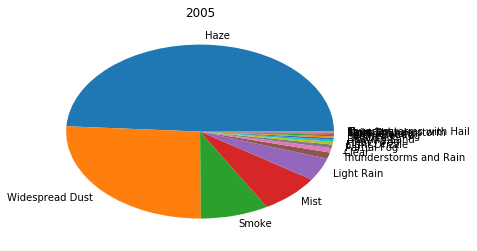

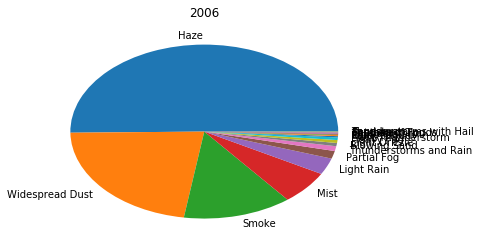

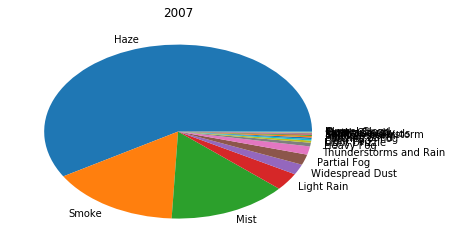

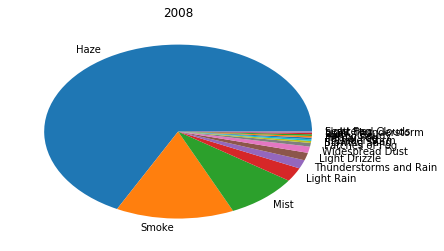

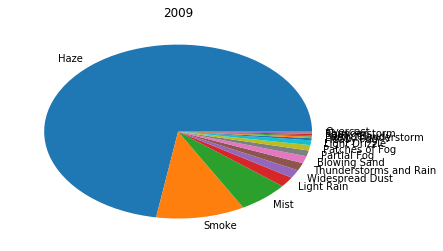

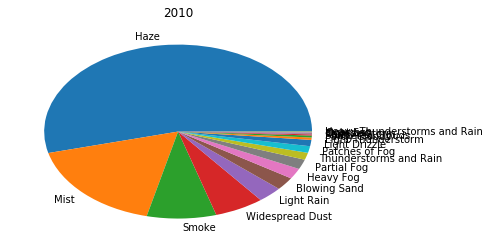

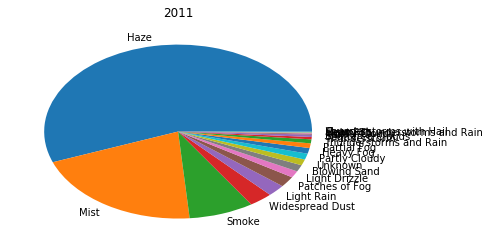

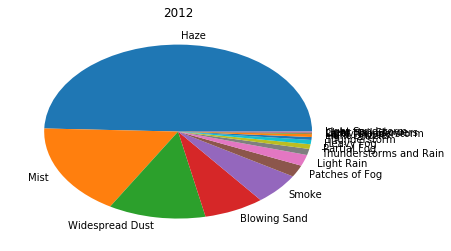

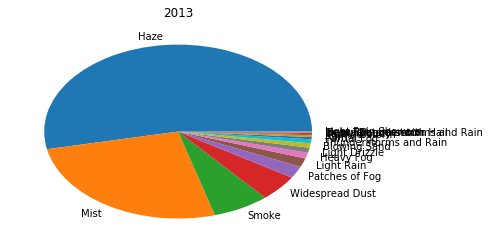

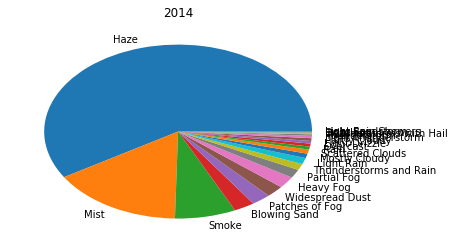

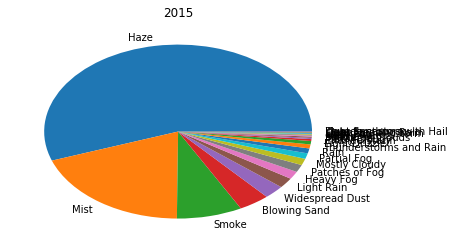

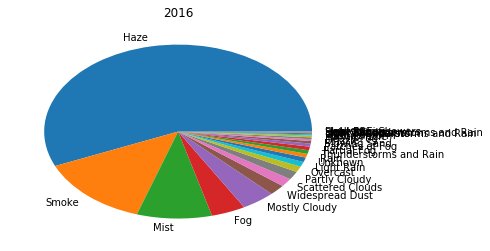

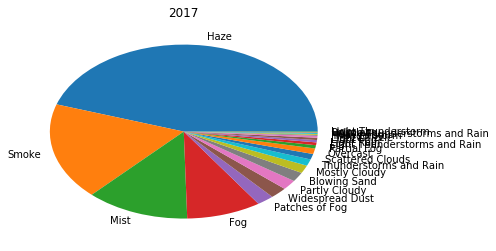

In [25]:
for k in dic_grp:
    i=dic_grp[k][0]
    j=dic_grp[k][-1]
    ps=df2[i:j]["conds"].value_counts()
    plt.pie(list(ps.values),labels=list(ps.index))
    plt.title(k)
    plt.show()